In [375]:
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
import torch.optim as optim
import matplotlib.pyplot as plt
import random

## 数据预处理

In [376]:
with open('/root/jupyter/housing.data.txt', 'r', encoding='utf8') as f:
    l = f.readlines()

In [377]:
middle = []
for i in l:
    middle.append([float(j) for j in i.split()][0:13])

In [378]:
#计算均值、方差
mean  = np.mean(np.array(middle), axis=0)
std = np.std(np.array(middle), axis=0)
print(mean,std)

[3.61352356e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
 5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
 9.54940711e+00 4.08237154e+02 1.84555336e+01 3.56674032e+02
 1.26530632e+01] [8.59304135e+00 2.32993957e+01 6.85357058e+00 2.53742935e-01
 1.15763115e-01 7.01922514e-01 2.81210326e+01 2.10362836e+00
 8.69865112e+00 1.68370495e+02 2.16280519e+00 9.12046075e+01
 7.13400164e+00]


In [379]:
x_train = []
y_train = []
x_test = []
y_test = []

In [380]:
num = 0
random.shuffle(l)
for i in l:
    if num <= 420:
        x_train.append([float(j) for j in i.split()][0:13])
        y_train.append([float(j) for j in i.split()][13:])
    else:
        x_test.append([float(j) for j in i.split()][0:13])
        y_test.append([float(j) for j in i.split()][13:])
    num += 1

In [381]:
x_train = torch.from_numpy((np.array(x_train,dtype=np.float32)-mean)/std).float()
y_train = torch.from_numpy(np.array(y_train,dtype=np.float32))
x_test = torch.from_numpy((np.array(x_test,dtype=np.float32)-mean)/std).float()
y_test = torch.from_numpy(np.array(y_test,dtype=np.float32))

## 构建、训练模型

In [382]:
class LinearRegression(nn.Module):
    def __init__(self, input_num, output_num):
        super(LinearRegression, self).__init__()
        self.linear1 = nn.Linear(input_num, 128)
        self.linear2 = nn.Linear(128, 64)
        self.linear3 = nn.Linear(64, output_num)
    
    def forward(self, x):
        out = self.linear1(x)
        #print(out)
        out = self.linear2(out)
        out = self.linear3(out)
        return out

In [383]:
model = LinearRegression(13,1)

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [384]:
num_epochs = 1000
for epoch in range(num_epochs):
    inputs = Variable(x_train)
    target = Variable(y_train)
    
    #forward
    out = model(inputs)
    #print(out)
    #break
    loss = criterion(out, target)
    
    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss:{:.6f}'.format(epoch+1, num_epochs, loss.data))

Epoch[20/1000], loss:165.899399
Epoch[40/1000], loss:23.080650
Epoch[60/1000], loss:22.197723
Epoch[80/1000], loss:21.899021
Epoch[100/1000], loss:21.783577
Epoch[120/1000], loss:21.736135
Epoch[140/1000], loss:21.715145
Epoch[160/1000], loss:21.704990
Epoch[180/1000], loss:21.699589
Epoch[200/1000], loss:21.696470
Epoch[220/1000], loss:21.694546
Epoch[240/1000], loss:21.693306
Epoch[260/1000], loss:21.692488
Epoch[280/1000], loss:21.691940
Epoch[300/1000], loss:21.691572
Epoch[320/1000], loss:21.691322
Epoch[340/1000], loss:21.691149
Epoch[360/1000], loss:21.691031
Epoch[380/1000], loss:21.690952
Epoch[400/1000], loss:21.690897
Epoch[420/1000], loss:21.690857
Epoch[440/1000], loss:21.690834
Epoch[460/1000], loss:21.690819
Epoch[480/1000], loss:21.690804
Epoch[500/1000], loss:21.690798
Epoch[520/1000], loss:21.690792
Epoch[540/1000], loss:21.690788
Epoch[560/1000], loss:21.690783
Epoch[580/1000], loss:21.690783
Epoch[600/1000], loss:21.690781
Epoch[620/1000], loss:21.690781
Epoch[640/1

## 模型预测

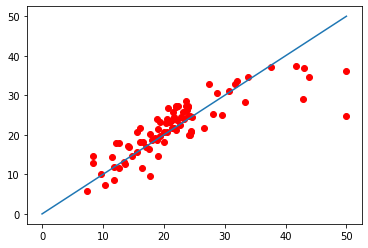

In [386]:
model.eval()
predict = model(Variable(x_test))
predict = predict.data.numpy()

x1 = np.linspace(0,50,1000)
y1 = x1
plt.plot(y_test.numpy(), predict, 'ro', label='Original data')
plt.plot(x1, y1, label='Line')
plt.show()